# Keras for Multi-Class Classification

This notebook demonstrates the use of keras functions for multi-class classification problem, Satellite Imaging Dataset, from *source*, UCI repository, a  database was generated
from data purchased from NASA by the Australian Centre
for Remote Sensing, and used for research at: The Centre for Remote Sensing,NSW 2033,Australia.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Necessary Imports 

In [1]:
import pandas as pd

Importing the file into **pandas** dataframe

In [2]:
df = pd.read_csv(r"G:\Ddrive\PG DBDA\12 Practical Machine Learning_/Cases/Satellite Imaging/Satellite.csv",sep=";")
df.head()

,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10,...,x.28,x.29,x.30,x.31,x.32,x.33,x.34,x.35,x.36,classes
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,grey soil
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,grey soil
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,grey soil
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,grey soil
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,grey soil


In [3]:
print(df["classes"].unique())

['grey soil' 'damp grey soil' 'vegetation stubble' 'very damp grey soil'
 'cotton crop' 'red soil']


In [4]:
df.shape

(6435, 37)

For the column **classes** which is a response variable, the hot encoding / dummying needs to be done.

In [5]:
y = df.iloc[:,-1]
y.head()

0    grey soil
1    grey soil
2    grey soil
3    grey soil
4    grey soil
Name: classes, dtype: object

In [6]:
from sklearn.preprocessing import LabelEncoder
lbcode = LabelEncoder()
y = lbcode.fit_transform(y)
y[:5]

array([2, 2, 2, 2, 2])

We now create two separate objects for feature variables X  and output variable   y

In [7]:
X = df.iloc[:,:-1]

In [8]:
X.head()

,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10,...,x.27,x.28,x.29,x.30,x.31,x.32,x.33,x.34,x.35,x.36
0,92,115,120,94,84,102,106,79,84,102,...,134,104,88,121,128,100,84,107,113,87
1,84,102,106,79,84,102,102,83,80,102,...,128,100,84,107,113,87,84,99,104,79
2,84,102,102,83,80,102,102,79,84,94,...,113,87,84,99,104,79,84,99,104,79
3,80,102,102,79,84,94,102,79,80,94,...,104,79,84,99,104,79,84,103,104,79
4,84,94,102,79,80,94,98,76,80,102,...,104,79,84,103,104,79,79,107,109,87


Scaling the data

We now, split the data into train and test

In [9]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, 
                                                    random_state=2024,stratify=y)

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)  

In [11]:
(X_train.shape, y_train.shape)

((5791, 36), (5791,))

Let us now define the neural network through which we plan to build the MLP model

Necessary Imports

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from keras import metrics

**Model Definition:**

In [13]:
tf.random.set_seed(2021)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(7, activation='relu',input_shape=(X_train.shape[1], )), 
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')  
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

**Model Fitting:**

In [14]:
model.fit( X_train,y_train,validation_data=(X_test,y_test),verbose=2,epochs=1000)

Epoch 1/1000
181/181 - 6s - loss: 1.6867 - accuracy: 0.4571 - val_loss: 1.5365 - val_accuracy: 0.3665 - 6s/epoch - 31ms/step
Epoch 2/1000
181/181 - 1s - loss: 1.3350 - accuracy: 0.5115 - val_loss: 1.1725 - val_accuracy: 0.5481 - 873ms/epoch - 5ms/step
Epoch 3/1000
181/181 - 1s - loss: 1.0755 - accuracy: 0.5607 - val_loss: 1.0174 - val_accuracy: 0.5901 - 833ms/epoch - 5ms/step
Epoch 4/1000
181/181 - 1s - loss: 0.9567 - accuracy: 0.6234 - val_loss: 0.9343 - val_accuracy: 0.6615 - 839ms/epoch - 5ms/step
Epoch 5/1000
181/181 - 1s - loss: 0.8898 - accuracy: 0.6795 - val_loss: 0.8915 - val_accuracy: 0.6941 - 841ms/epoch - 5ms/step
Epoch 6/1000
181/181 - 1s - loss: 0.8484 - accuracy: 0.7013 - val_loss: 0.8689 - val_accuracy: 0.6910 - 836ms/epoch - 5ms/step
Epoch 7/1000
181/181 - 1s - loss: 0.8153 - accuracy: 0.7130 - val_loss: 0.8308 - val_accuracy: 0.7143 - 901ms/epoch - 5ms/step
Epoch 8/1000
181/181 - 1s - loss: 0.7933 - accuracy: 0.7116 - val_loss: 0.8152 - val_accuracy: 0.7096 - 1s/epoch 

Epoch 66/1000
181/181 - 1s - loss: 0.5107 - accuracy: 0.8023 - val_loss: 0.5775 - val_accuracy: 0.8230 - 1s/epoch - 6ms/step
Epoch 67/1000
181/181 - 1s - loss: 0.5059 - accuracy: 0.8068 - val_loss: 0.5600 - val_accuracy: 0.8214 - 937ms/epoch - 5ms/step
Epoch 68/1000
181/181 - 1s - loss: 0.5055 - accuracy: 0.8101 - val_loss: 0.5756 - val_accuracy: 0.8261 - 912ms/epoch - 5ms/step
Epoch 69/1000
181/181 - 1s - loss: 0.5050 - accuracy: 0.8090 - val_loss: 0.5597 - val_accuracy: 0.8183 - 908ms/epoch - 5ms/step
Epoch 70/1000
181/181 - 1s - loss: 0.5042 - accuracy: 0.8088 - val_loss: 0.5677 - val_accuracy: 0.8261 - 845ms/epoch - 5ms/step
Epoch 71/1000
181/181 - 1s - loss: 0.5031 - accuracy: 0.8092 - val_loss: 0.5534 - val_accuracy: 0.8276 - 827ms/epoch - 5ms/step
Epoch 72/1000
181/181 - 1s - loss: 0.5010 - accuracy: 0.8080 - val_loss: 0.5670 - val_accuracy: 0.8152 - 840ms/epoch - 5ms/step
Epoch 73/1000
181/181 - 1s - loss: 0.5016 - accuracy: 0.8068 - val_loss: 0.5531 - val_accuracy: 0.8261 - 83

181/181 - 1s - loss: 0.4315 - accuracy: 0.8403 - val_loss: 0.4846 - val_accuracy: 0.8525 - 834ms/epoch - 5ms/step
Epoch 131/1000
181/181 - 1s - loss: 0.4319 - accuracy: 0.8365 - val_loss: 0.4848 - val_accuracy: 0.8478 - 830ms/epoch - 5ms/step
Epoch 132/1000
181/181 - 1s - loss: 0.4284 - accuracy: 0.8387 - val_loss: 0.4827 - val_accuracy: 0.8494 - 837ms/epoch - 5ms/step
Epoch 133/1000
181/181 - 1s - loss: 0.4262 - accuracy: 0.8406 - val_loss: 0.4946 - val_accuracy: 0.8478 - 839ms/epoch - 5ms/step
Epoch 134/1000
181/181 - 1s - loss: 0.4277 - accuracy: 0.8368 - val_loss: 0.4957 - val_accuracy: 0.8370 - 890ms/epoch - 5ms/step
Epoch 135/1000
181/181 - 1s - loss: 0.4261 - accuracy: 0.8413 - val_loss: 0.4790 - val_accuracy: 0.8478 - 872ms/epoch - 5ms/step
Epoch 136/1000
181/181 - 1s - loss: 0.4250 - accuracy: 0.8427 - val_loss: 0.4838 - val_accuracy: 0.8509 - 1s/epoch - 6ms/step
Epoch 137/1000
181/181 - 1s - loss: 0.4258 - accuracy: 0.8403 - val_loss: 0.4770 - val_accuracy: 0.8463 - 920ms/epo

Epoch 194/1000
181/181 - 1s - loss: 0.3793 - accuracy: 0.8511 - val_loss: 0.4192 - val_accuracy: 0.8634 - 835ms/epoch - 5ms/step
Epoch 195/1000
181/181 - 1s - loss: 0.3778 - accuracy: 0.8536 - val_loss: 0.4181 - val_accuracy: 0.8509 - 840ms/epoch - 5ms/step
Epoch 196/1000
181/181 - 1s - loss: 0.3753 - accuracy: 0.8536 - val_loss: 0.4189 - val_accuracy: 0.8587 - 922ms/epoch - 5ms/step
Epoch 197/1000
181/181 - 1s - loss: 0.3744 - accuracy: 0.8534 - val_loss: 0.4154 - val_accuracy: 0.8571 - 1s/epoch - 6ms/step
Epoch 198/1000
181/181 - 1s - loss: 0.3730 - accuracy: 0.8515 - val_loss: 0.4111 - val_accuracy: 0.8509 - 905ms/epoch - 5ms/step
Epoch 199/1000
181/181 - 1s - loss: 0.3737 - accuracy: 0.8520 - val_loss: 0.4115 - val_accuracy: 0.8540 - 836ms/epoch - 5ms/step
Epoch 200/1000
181/181 - 1s - loss: 0.3737 - accuracy: 0.8539 - val_loss: 0.4113 - val_accuracy: 0.8602 - 831ms/epoch - 5ms/step
Epoch 201/1000
181/181 - 1s - loss: 0.3826 - accuracy: 0.8511 - val_loss: 0.4174 - val_accuracy: 0.8

Epoch 259/1000
181/181 - 1s - loss: 0.3500 - accuracy: 0.8605 - val_loss: 0.3876 - val_accuracy: 0.8478 - 1s/epoch - 6ms/step
Epoch 260/1000
181/181 - 1s - loss: 0.3498 - accuracy: 0.8627 - val_loss: 0.3724 - val_accuracy: 0.8680 - 1s/epoch - 6ms/step
Epoch 261/1000
181/181 - 1s - loss: 0.3473 - accuracy: 0.8625 - val_loss: 0.3767 - val_accuracy: 0.8680 - 1s/epoch - 6ms/step
Epoch 262/1000
181/181 - 1s - loss: 0.3495 - accuracy: 0.8610 - val_loss: 0.3702 - val_accuracy: 0.8680 - 1s/epoch - 7ms/step
Epoch 263/1000
181/181 - 1s - loss: 0.3501 - accuracy: 0.8608 - val_loss: 0.3669 - val_accuracy: 0.8665 - 1s/epoch - 6ms/step
Epoch 264/1000
181/181 - 1s - loss: 0.3488 - accuracy: 0.8613 - val_loss: 0.3699 - val_accuracy: 0.8634 - 964ms/epoch - 5ms/step
Epoch 265/1000
181/181 - 1s - loss: 0.3466 - accuracy: 0.8606 - val_loss: 0.3702 - val_accuracy: 0.8680 - 1s/epoch - 6ms/step
Epoch 266/1000
181/181 - 1s - loss: 0.3458 - accuracy: 0.8617 - val_loss: 0.3771 - val_accuracy: 0.8696 - 1s/epoch 

181/181 - 1s - loss: 0.3366 - accuracy: 0.8679 - val_loss: 0.3522 - val_accuracy: 0.8696 - 911ms/epoch - 5ms/step
Epoch 324/1000
181/181 - 1s - loss: 0.3360 - accuracy: 0.8655 - val_loss: 0.3555 - val_accuracy: 0.8680 - 1s/epoch - 6ms/step
Epoch 325/1000
181/181 - 1s - loss: 0.3361 - accuracy: 0.8624 - val_loss: 0.3527 - val_accuracy: 0.8758 - 1s/epoch - 7ms/step
Epoch 326/1000
181/181 - 1s - loss: 0.3353 - accuracy: 0.8662 - val_loss: 0.3570 - val_accuracy: 0.8696 - 940ms/epoch - 5ms/step
Epoch 327/1000
181/181 - 1s - loss: 0.3373 - accuracy: 0.8650 - val_loss: 0.3522 - val_accuracy: 0.8711 - 855ms/epoch - 5ms/step
Epoch 328/1000
181/181 - 1s - loss: 0.3367 - accuracy: 0.8658 - val_loss: 0.3569 - val_accuracy: 0.8649 - 889ms/epoch - 5ms/step
Epoch 329/1000
181/181 - 1s - loss: 0.3360 - accuracy: 0.8650 - val_loss: 0.3583 - val_accuracy: 0.8665 - 856ms/epoch - 5ms/step
Epoch 330/1000
181/181 - 1s - loss: 0.3347 - accuracy: 0.8643 - val_loss: 0.3667 - val_accuracy: 0.8618 - 843ms/epoch 

Epoch 387/1000
181/181 - 1s - loss: 0.3290 - accuracy: 0.8660 - val_loss: 0.3546 - val_accuracy: 0.8711 - 825ms/epoch - 5ms/step
Epoch 388/1000
181/181 - 1s - loss: 0.3324 - accuracy: 0.8672 - val_loss: 0.3500 - val_accuracy: 0.8758 - 831ms/epoch - 5ms/step
Epoch 389/1000
181/181 - 1s - loss: 0.3282 - accuracy: 0.8691 - val_loss: 0.3397 - val_accuracy: 0.8758 - 828ms/epoch - 5ms/step
Epoch 390/1000
181/181 - 1s - loss: 0.3271 - accuracy: 0.8670 - val_loss: 0.3420 - val_accuracy: 0.8696 - 832ms/epoch - 5ms/step
Epoch 391/1000
181/181 - 1s - loss: 0.3291 - accuracy: 0.8686 - val_loss: 0.3517 - val_accuracy: 0.8711 - 890ms/epoch - 5ms/step
Epoch 392/1000
181/181 - 1s - loss: 0.3307 - accuracy: 0.8663 - val_loss: 0.3496 - val_accuracy: 0.8665 - 938ms/epoch - 5ms/step
Epoch 393/1000
181/181 - 1s - loss: 0.3292 - accuracy: 0.8643 - val_loss: 0.3418 - val_accuracy: 0.8680 - 897ms/epoch - 5ms/step
Epoch 394/1000
181/181 - 1s - loss: 0.3289 - accuracy: 0.8679 - val_loss: 0.3414 - val_accuracy: 

Epoch 451/1000
181/181 - 1s - loss: 0.3270 - accuracy: 0.8665 - val_loss: 0.3425 - val_accuracy: 0.8773 - 830ms/epoch - 5ms/step
Epoch 452/1000
181/181 - 1s - loss: 0.3241 - accuracy: 0.8676 - val_loss: 0.3432 - val_accuracy: 0.8727 - 835ms/epoch - 5ms/step
Epoch 453/1000
181/181 - 1s - loss: 0.3264 - accuracy: 0.8684 - val_loss: 0.3387 - val_accuracy: 0.8742 - 840ms/epoch - 5ms/step
Epoch 454/1000
181/181 - 1s - loss: 0.3246 - accuracy: 0.8679 - val_loss: 0.3411 - val_accuracy: 0.8804 - 836ms/epoch - 5ms/step
Epoch 455/1000
181/181 - 1s - loss: 0.3233 - accuracy: 0.8672 - val_loss: 0.3416 - val_accuracy: 0.8742 - 829ms/epoch - 5ms/step
Epoch 456/1000
181/181 - 1s - loss: 0.3260 - accuracy: 0.8700 - val_loss: 0.3565 - val_accuracy: 0.8571 - 825ms/epoch - 5ms/step
Epoch 457/1000
181/181 - 1s - loss: 0.3253 - accuracy: 0.8696 - val_loss: 0.3434 - val_accuracy: 0.8696 - 855ms/epoch - 5ms/step
Epoch 458/1000
181/181 - 1s - loss: 0.3238 - accuracy: 0.8688 - val_loss: 0.3423 - val_accuracy: 

Epoch 515/1000
181/181 - 1s - loss: 0.3215 - accuracy: 0.8684 - val_loss: 0.3364 - val_accuracy: 0.8789 - 948ms/epoch - 5ms/step
Epoch 516/1000
181/181 - 1s - loss: 0.3207 - accuracy: 0.8712 - val_loss: 0.3407 - val_accuracy: 0.8773 - 931ms/epoch - 5ms/step
Epoch 517/1000
181/181 - 1s - loss: 0.3257 - accuracy: 0.8695 - val_loss: 0.3487 - val_accuracy: 0.8711 - 872ms/epoch - 5ms/step
Epoch 518/1000
181/181 - 1s - loss: 0.3226 - accuracy: 0.8691 - val_loss: 0.3666 - val_accuracy: 0.8634 - 827ms/epoch - 5ms/step
Epoch 519/1000
181/181 - 1s - loss: 0.3266 - accuracy: 0.8684 - val_loss: 0.3623 - val_accuracy: 0.8758 - 846ms/epoch - 5ms/step
Epoch 520/1000
181/181 - 1s - loss: 0.3240 - accuracy: 0.8677 - val_loss: 0.3391 - val_accuracy: 0.8835 - 917ms/epoch - 5ms/step
Epoch 521/1000
181/181 - 1s - loss: 0.3200 - accuracy: 0.8733 - val_loss: 0.3541 - val_accuracy: 0.8649 - 954ms/epoch - 5ms/step
Epoch 522/1000
181/181 - 1s - loss: 0.3261 - accuracy: 0.8720 - val_loss: 0.3405 - val_accuracy: 

Epoch 579/1000
181/181 - 1s - loss: 0.3171 - accuracy: 0.8715 - val_loss: 0.3376 - val_accuracy: 0.8898 - 853ms/epoch - 5ms/step
Epoch 580/1000
181/181 - 1s - loss: 0.3158 - accuracy: 0.8752 - val_loss: 0.3345 - val_accuracy: 0.8742 - 904ms/epoch - 5ms/step
Epoch 581/1000
181/181 - 1s - loss: 0.3161 - accuracy: 0.8719 - val_loss: 0.3295 - val_accuracy: 0.8727 - 894ms/epoch - 5ms/step
Epoch 582/1000
181/181 - 1s - loss: 0.3175 - accuracy: 0.8726 - val_loss: 0.3577 - val_accuracy: 0.8882 - 857ms/epoch - 5ms/step
Epoch 583/1000
181/181 - 1s - loss: 0.3182 - accuracy: 0.8715 - val_loss: 0.3458 - val_accuracy: 0.8789 - 855ms/epoch - 5ms/step
Epoch 584/1000
181/181 - 1s - loss: 0.3170 - accuracy: 0.8736 - val_loss: 0.3335 - val_accuracy: 0.8820 - 838ms/epoch - 5ms/step
Epoch 585/1000
181/181 - 1s - loss: 0.3168 - accuracy: 0.8719 - val_loss: 0.3356 - val_accuracy: 0.8742 - 837ms/epoch - 5ms/step
Epoch 586/1000
181/181 - 1s - loss: 0.3185 - accuracy: 0.8712 - val_loss: 0.3328 - val_accuracy: 

Epoch 643/1000
181/181 - 1s - loss: 0.3134 - accuracy: 0.8736 - val_loss: 0.3327 - val_accuracy: 0.8727 - 922ms/epoch - 5ms/step
Epoch 644/1000
181/181 - 1s - loss: 0.3112 - accuracy: 0.8757 - val_loss: 0.3343 - val_accuracy: 0.8820 - 886ms/epoch - 5ms/step
Epoch 645/1000
181/181 - 1s - loss: 0.3129 - accuracy: 0.8752 - val_loss: 0.3369 - val_accuracy: 0.8773 - 945ms/epoch - 5ms/step
Epoch 646/1000
181/181 - 1s - loss: 0.3149 - accuracy: 0.8722 - val_loss: 0.3307 - val_accuracy: 0.8758 - 1s/epoch - 7ms/step
Epoch 647/1000
181/181 - 2s - loss: 0.3155 - accuracy: 0.8729 - val_loss: 0.3362 - val_accuracy: 0.8727 - 2s/epoch - 10ms/step
Epoch 648/1000
181/181 - 2s - loss: 0.3129 - accuracy: 0.8727 - val_loss: 0.3445 - val_accuracy: 0.8851 - 2s/epoch - 10ms/step
Epoch 649/1000
181/181 - 2s - loss: 0.3141 - accuracy: 0.8729 - val_loss: 0.3328 - val_accuracy: 0.8851 - 2s/epoch - 11ms/step
Epoch 650/1000
181/181 - 1s - loss: 0.3138 - accuracy: 0.8727 - val_loss: 0.3279 - val_accuracy: 0.8851 - 

181/181 - 1s - loss: 0.3123 - accuracy: 0.8733 - val_loss: 0.3281 - val_accuracy: 0.8804 - 844ms/epoch - 5ms/step
Epoch 708/1000
181/181 - 1s - loss: 0.3081 - accuracy: 0.8784 - val_loss: 0.3443 - val_accuracy: 0.8851 - 837ms/epoch - 5ms/step
Epoch 709/1000
181/181 - 1s - loss: 0.3116 - accuracy: 0.8739 - val_loss: 0.3268 - val_accuracy: 0.8742 - 832ms/epoch - 5ms/step
Epoch 710/1000
181/181 - 1s - loss: 0.3127 - accuracy: 0.8733 - val_loss: 0.3274 - val_accuracy: 0.8820 - 850ms/epoch - 5ms/step
Epoch 711/1000
181/181 - 1s - loss: 0.3118 - accuracy: 0.8717 - val_loss: 0.3302 - val_accuracy: 0.8804 - 866ms/epoch - 5ms/step
Epoch 712/1000
181/181 - 1s - loss: 0.3121 - accuracy: 0.8726 - val_loss: 0.3310 - val_accuracy: 0.8835 - 849ms/epoch - 5ms/step
Epoch 713/1000
181/181 - 1s - loss: 0.3107 - accuracy: 0.8739 - val_loss: 0.3415 - val_accuracy: 0.8851 - 837ms/epoch - 5ms/step
Epoch 714/1000
181/181 - 1s - loss: 0.3156 - accuracy: 0.8733 - val_loss: 0.3324 - val_accuracy: 0.8820 - 906ms/

Epoch 771/1000
181/181 - 1s - loss: 0.3087 - accuracy: 0.8753 - val_loss: 0.3460 - val_accuracy: 0.8602 - 901ms/epoch - 5ms/step
Epoch 772/1000
181/181 - 1s - loss: 0.3100 - accuracy: 0.8746 - val_loss: 0.3256 - val_accuracy: 0.8804 - 932ms/epoch - 5ms/step
Epoch 773/1000
181/181 - 1s - loss: 0.3092 - accuracy: 0.8758 - val_loss: 0.3251 - val_accuracy: 0.8742 - 979ms/epoch - 5ms/step
Epoch 774/1000
181/181 - 1s - loss: 0.3102 - accuracy: 0.8748 - val_loss: 0.3314 - val_accuracy: 0.8773 - 988ms/epoch - 5ms/step
Epoch 775/1000
181/181 - 1s - loss: 0.3101 - accuracy: 0.8733 - val_loss: 0.3258 - val_accuracy: 0.8773 - 931ms/epoch - 5ms/step
Epoch 776/1000
181/181 - 1s - loss: 0.3108 - accuracy: 0.8739 - val_loss: 0.3254 - val_accuracy: 0.8789 - 913ms/epoch - 5ms/step
Epoch 777/1000
181/181 - 1s - loss: 0.3094 - accuracy: 0.8748 - val_loss: 0.3349 - val_accuracy: 0.8742 - 890ms/epoch - 5ms/step
Epoch 778/1000
181/181 - 1s - loss: 0.3081 - accuracy: 0.8755 - val_loss: 0.3285 - val_accuracy: 

Epoch 835/1000
181/181 - 2s - loss: 0.3078 - accuracy: 0.8752 - val_loss: 0.3317 - val_accuracy: 0.8851 - 2s/epoch - 9ms/step
Epoch 836/1000
181/181 - 2s - loss: 0.3089 - accuracy: 0.8757 - val_loss: 0.3274 - val_accuracy: 0.8835 - 2s/epoch - 13ms/step
Epoch 837/1000
181/181 - 3s - loss: 0.3083 - accuracy: 0.8746 - val_loss: 0.3228 - val_accuracy: 0.8773 - 3s/epoch - 14ms/step
Epoch 838/1000
181/181 - 2s - loss: 0.3090 - accuracy: 0.8769 - val_loss: 0.3293 - val_accuracy: 0.8773 - 2s/epoch - 10ms/step
Epoch 839/1000
181/181 - 2s - loss: 0.3067 - accuracy: 0.8753 - val_loss: 0.3289 - val_accuracy: 0.8758 - 2s/epoch - 10ms/step
Epoch 840/1000
181/181 - 2s - loss: 0.3085 - accuracy: 0.8758 - val_loss: 0.3312 - val_accuracy: 0.8820 - 2s/epoch - 12ms/step
Epoch 841/1000
181/181 - 2s - loss: 0.3090 - accuracy: 0.8734 - val_loss: 0.3368 - val_accuracy: 0.8742 - 2s/epoch - 10ms/step
Epoch 842/1000
181/181 - 2s - loss: 0.3082 - accuracy: 0.8746 - val_loss: 0.3461 - val_accuracy: 0.8804 - 2s/epo

Epoch 900/1000
181/181 - 1s - loss: 0.3078 - accuracy: 0.8745 - val_loss: 0.3281 - val_accuracy: 0.8804 - 1s/epoch - 8ms/step
Epoch 901/1000
181/181 - 1s - loss: 0.3069 - accuracy: 0.8748 - val_loss: 0.3466 - val_accuracy: 0.8680 - 1s/epoch - 6ms/step
Epoch 902/1000
181/181 - 1s - loss: 0.3068 - accuracy: 0.8764 - val_loss: 0.3313 - val_accuracy: 0.8758 - 1s/epoch - 6ms/step
Epoch 903/1000
181/181 - 1s - loss: 0.3071 - accuracy: 0.8734 - val_loss: 0.3327 - val_accuracy: 0.8851 - 1s/epoch - 6ms/step
Epoch 904/1000
181/181 - 1s - loss: 0.3080 - accuracy: 0.8748 - val_loss: 0.3380 - val_accuracy: 0.8742 - 1s/epoch - 7ms/step
Epoch 905/1000
181/181 - 1s - loss: 0.3087 - accuracy: 0.8734 - val_loss: 0.3301 - val_accuracy: 0.8789 - 1s/epoch - 6ms/step
Epoch 906/1000
181/181 - 1s - loss: 0.3070 - accuracy: 0.8746 - val_loss: 0.3294 - val_accuracy: 0.8789 - 995ms/epoch - 5ms/step
Epoch 907/1000
181/181 - 1s - loss: 0.3056 - accuracy: 0.8790 - val_loss: 0.3424 - val_accuracy: 0.8727 - 1s/epoch 

Epoch 964/1000
181/181 - 1s - loss: 0.3096 - accuracy: 0.8748 - val_loss: 0.3276 - val_accuracy: 0.8742 - 937ms/epoch - 5ms/step
Epoch 965/1000
181/181 - 1s - loss: 0.3050 - accuracy: 0.8765 - val_loss: 0.3339 - val_accuracy: 0.8804 - 1s/epoch - 6ms/step
Epoch 966/1000
181/181 - 1s - loss: 0.3072 - accuracy: 0.8724 - val_loss: 0.3238 - val_accuracy: 0.8773 - 1s/epoch - 6ms/step
Epoch 967/1000
181/181 - 1s - loss: 0.3059 - accuracy: 0.8755 - val_loss: 0.3341 - val_accuracy: 0.8773 - 1s/epoch - 6ms/step
Epoch 968/1000
181/181 - 1s - loss: 0.3057 - accuracy: 0.8736 - val_loss: 0.3285 - val_accuracy: 0.8789 - 1s/epoch - 6ms/step
Epoch 969/1000
181/181 - 1s - loss: 0.3070 - accuracy: 0.8772 - val_loss: 0.3293 - val_accuracy: 0.8758 - 988ms/epoch - 5ms/step
Epoch 970/1000
181/181 - 1s - loss: 0.3097 - accuracy: 0.8755 - val_loss: 0.3410 - val_accuracy: 0.8680 - 867ms/epoch - 5ms/step
Epoch 971/1000
181/181 - 1s - loss: 0.3079 - accuracy: 0.8752 - val_loss: 0.3354 - val_accuracy: 0.8804 - 946

In [18]:
y_pred = model.predict(X_test)
y_pred[:5]

21/21 [==============================] - 0s 4ms/step


array([[7.04155264e-06, 4.61352849e-03, 1.31762701e-09, 1.95776639e-08,
        1.79927088e-02, 9.77386653e-01],
       [9.77200827e-08, 3.26351284e-08, 7.45643604e-07, 9.97607529e-01,
        2.39149202e-03, 1.79546646e-07],
       [9.90300464e-07, 0.00000000e+00, 3.07813241e-18, 9.99988377e-01,
        1.06414645e-05, 6.07837790e-28],
       [7.87383760e-05, 3.16001594e-01, 5.99923611e-01, 6.57531141e-09,
        2.05015294e-06, 8.39940533e-02],
       [2.57294300e-06, 3.47643252e-03, 8.49537996e-10, 3.50768137e-10,
        1.79111061e-03, 9.94729877e-01]], dtype=float32)

In [20]:
import numpy as np
argmax = np.argmax(y_pred,axis=1)
argmax[:5]

array([5, 3, 3, 2, 5], dtype=int64)

In [21]:
y_pred_original = lbcode.inverse_transform(argmax)
y_pred_original[:5]

array(['very damp grey soil', 'red soil', 'red soil', 'grey soil',
       'very damp grey soil'], dtype=object)

In [22]:
loss, acc = model.evaluate(X_test, y_test,verbose=0)
print('Test loss = {:.4f} '.format(loss))
print('Test acc = {:.4f} '.format(acc))

Test loss = 0.3358 
Test acc = 0.8696 


In [28]:
from sklearn.metrics import accuracy_score,roc_auc_score
print(f'Accuracy_score: {accuracy_score(y_test, argmax)}')

Accuracy_score:0.8695652173913043


In [27]:
print(roc_auc_score(y_test, y_pred,multi_class='ovr'))
print(roc_auc_score(y_test, y_pred,multi_class='ovo'))

0.9801608342603786
0.9797704335445243


# Early Stopping

If we continue to train the network, it may overfit. We can have a stop point where the accuracy may start falling.

**Model Definition:**

In [29]:
import numpy as np
tf.random.set_seed(2021)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(7, activation='relu',input_shape=(X_train.shape[1], )), 
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')  
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

**Model Fitting:**

In [30]:
from tensorflow.keras.callbacks import EarlyStopping
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto',
        restore_best_weights=True)
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),callbacks=[monitor],verbose=2,epochs=1000)

Epoch 1/1000
181/181 - 4s - loss: 1.6567 - accuracy: 0.2179 - val_loss: 1.5813 - val_accuracy: 0.2547 - 4s/epoch - 21ms/step
Epoch 2/1000
181/181 - 1s - loss: 1.5307 - accuracy: 0.2892 - val_loss: 1.4785 - val_accuracy: 0.3121 - 839ms/epoch - 5ms/step
Epoch 3/1000
181/181 - 1s - loss: 1.4244 - accuracy: 0.4362 - val_loss: 1.3720 - val_accuracy: 0.4876 - 825ms/epoch - 5ms/step
Epoch 4/1000
181/181 - 1s - loss: 1.3009 - accuracy: 0.5745 - val_loss: 1.2389 - val_accuracy: 0.6413 - 829ms/epoch - 5ms/step
Epoch 5/1000
181/181 - 1s - loss: 1.1469 - accuracy: 0.6444 - val_loss: 1.0871 - val_accuracy: 0.6724 - 845ms/epoch - 5ms/step
Epoch 6/1000
181/181 - 1s - loss: 0.9985 - accuracy: 0.7007 - val_loss: 0.9680 - val_accuracy: 0.7081 - 1s/epoch - 6ms/step
Epoch 7/1000
181/181 - 1s - loss: 0.8932 - accuracy: 0.7275 - val_loss: 0.8816 - val_accuracy: 0.7453 - 1s/epoch - 6ms/step
Epoch 8/1000
181/181 - 1s - loss: 0.8226 - accuracy: 0.7531 - val_loss: 0.8236 - val_accuracy: 0.7748 - 1s/epoch - 6ms/

Epoch 66/1000
181/181 - 1s - loss: 0.3714 - accuracy: 0.8584 - val_loss: 0.4084 - val_accuracy: 0.8509 - 836ms/epoch - 5ms/step
Epoch 67/1000
181/181 - 1s - loss: 0.3694 - accuracy: 0.8591 - val_loss: 0.3997 - val_accuracy: 0.8571 - 834ms/epoch - 5ms/step
Epoch 68/1000
181/181 - 1s - loss: 0.3689 - accuracy: 0.8586 - val_loss: 0.3990 - val_accuracy: 0.8540 - 833ms/epoch - 5ms/step
Epoch 69/1000
181/181 - 1s - loss: 0.3691 - accuracy: 0.8625 - val_loss: 0.3931 - val_accuracy: 0.8478 - 833ms/epoch - 5ms/step
Epoch 70/1000
181/181 - 1s - loss: 0.3670 - accuracy: 0.8608 - val_loss: 0.4134 - val_accuracy: 0.8494 - 829ms/epoch - 5ms/step
Epoch 71/1000
181/181 - 1s - loss: 0.3689 - accuracy: 0.8581 - val_loss: 0.3935 - val_accuracy: 0.8509 - 831ms/epoch - 5ms/step
Epoch 72/1000
181/181 - 1s - loss: 0.3635 - accuracy: 0.8596 - val_loss: 0.4049 - val_accuracy: 0.8571 - 828ms/epoch - 5ms/step
Epoch 73/1000
181/181 - 1s - loss: 0.3665 - accuracy: 0.8582 - val_loss: 0.3877 - val_accuracy: 0.8478 -

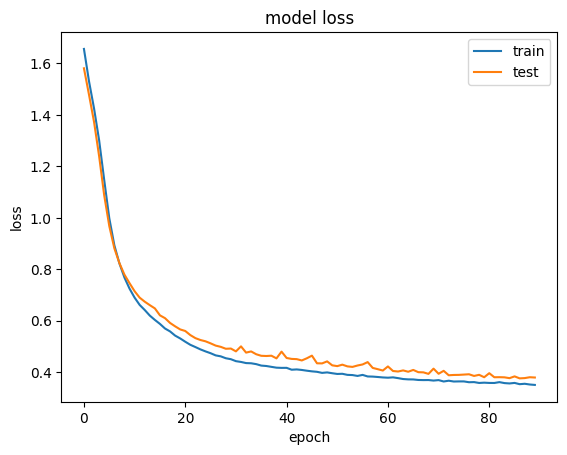

In [31]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [32]:
y_pred = model.predict(X_test)
y_pred[:5]

21/21 [==============================] - 0s 5ms/step


array([[6.3762105e-05, 3.4513686e-02, 1.0669038e-05, 1.6184011e-04,
        1.0962557e-01, 8.5562450e-01],
       [2.6579823e-09, 2.4922990e-04, 9.2511902e-05, 9.9794453e-01,
        1.6949441e-03, 1.8720337e-05],
       [1.0806624e-08, 1.8070019e-05, 5.5146381e-07, 9.8765868e-01,
        1.2317667e-02, 5.0980598e-06],
       [1.4104075e-05, 3.3962321e-01, 5.5053580e-01, 3.1584154e-06,
        2.4586896e-05, 1.0979908e-01],
       [3.5097295e-05, 3.0858142e-02, 7.9082974e-06, 6.4234038e-05,
        5.9952643e-02, 9.0908188e-01]], dtype=float32)

In [34]:
y_pred.shape

(644, 6)

In [36]:
pd.DataFrame(y_pred)

,0,1,2,3,4,5
0,6.376211e-05,0.034514,1.066904e-05,0.000162,0.109626,8.556245e-01
1,2.657982e-09,0.000249,9.251190e-05,0.997945,0.001695,1.872034e-05
2,1.080662e-08,0.000018,5.514638e-07,0.987659,0.012318,5.098060e-06
3,1.410407e-05,0.339623,5.505358e-01,0.000003,0.000025,1.097991e-01
4,3.509730e-05,0.030858,7.908297e-06,0.000064,0.059953,9.090819e-01
...,...,...,...,...,...,...
639,4.453499e-11,0.000002,1.243394e-07,0.999235,0.000763,1.937975e-07
640,2.635242e-02,0.006066,7.521176e-05,0.021100,0.933270,1.313641e-02
641,9.733419e-01,0.001917,5.394261e-04,0.000139,0.022671,1.391492e-03
642,1.054806e-04,0.017711,6.798477e-06,0.005210,0.717705,2.592608e-01


In [37]:
import numpy as np
argmax = np.argmax(y_pred,axis=1)
argmax[:5]

array([5, 3, 3, 2, 5], dtype=int64)

In [38]:
y_pred_original = lbcode.inverse_transform(argmax)
y_pred_original[:5]

array(['very damp grey soil', 'red soil', 'red soil', 'grey soil',
       'very damp grey soil'], dtype=object)

In [39]:
from sklearn.metrics import accuracy_score,roc_auc_score
print(f'Accuracy_score: {accuracy_score(y_test, argmax)}')

Accuracy_score: 0.8555900621118012


In [40]:
print(roc_auc_score(y_test, y_pred,multi_class='ovr'))
print(roc_auc_score(y_test, y_pred,multi_class='ovo'))

0.976199335059602
0.9752917418640833


In [41]:
loss, acc = model.evaluate(X_test, y_test,verbose=0)
print('Test loss = {:.4f} '.format(loss))
print('Test acc = {:.4f} '.format(acc))

Test loss = 0.3764 
Test acc = 0.8556 
